<h1> AirBnB Prices in New York</h1>

In [1]:
#import used packages
import os # for getting file size
import csv # for handling csv/tsv files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#pip install descartes
import descartes
#pip install geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon
from geopandas import GeoSeries
from shapely.geometry import Polygon

<h2>Documentation</h2>

<h3> Team </h3>

Our Team consists of:
<ol>
<li> Richard Petras, 11821492 </li>
<li> Kerstin Scharinger, 11813383 </li>
<li> Anna-Lena Schaub, 01451379 </li>
</ol>

Within our Team we tried to accomodate each others strengths and weaknesses in a constructive way. Throught the Project Richard and Kerstin were able to make use of their knowledge of Python and programming. In this area Anna-Lena was able to expand her knowledge due to the support and help of her Team Partners. Anna-Lena was responsible for the Documentation and Presentation.
Overall our group work benefitted from good communication and a consistent Feedback Loop which enabled everyone to work together on the different parts of the Project.

<h3> Scenario </h3>

In our Project we wanted to look at a number of different use cases:
<ol>
<li> Is the proximity of an Airbnb to any Subway Station directly related to its price, and if so, does an apartment with more proximity to any subway station automatically equal a higher price? </li>

<li> Can and Airbnb have a higher price due to the proximity to a specific subway station, and if so which attributes of the subway station (location, number of lines, city centre) are found to influence the pricing most? </li>

<li> Which independent variables in the Data are more influential to the pricing than the proximity to a subway station? </li>
</ol>

Our Hypothesis or expected outcome for these Researh Questions was, that Subway Stations in themselves are not responsible for a high price AirBnB, but that there are other factory like the wealthiness of the Area, proximity to Tourist Hot Spots that influence the pricing a lot more than just the proximity to any or a specific Subway Station. 

<h4> Used Data Sets </h4>

In order to answer the Research Question posed above, we used two Data Sets.
<ol>
<li> Inside Airbnb. In this Set we have detailed Data about all the listings through Airbnb from NYC. Within this Data Set we find information such as the price, ratings and other interesting facts about all listed AirBnBs within NYC </li>
<li> Subway Entrances. In this Set we finde the Subway entrances to the different Subway Stations in NYC. </li>
</ol>




<h3> Data Sources </h3>

We obtained our Datasets as shown below:
<ol>
<li> The Data is sourced from “Inside Airbnb”, which gets the Data from publicly available Information from the Airbnb site.: <a> www.data.insideairbnb.com/united-states/ny/new-york-city/2020-03-13/visualisations/listings.csv </a> </li>

<li> Data Set 2 (.xml): The second Data Set contains the subway stations in New York. We would use this accordingly to see whether being close to a Subway Station, or a specific subway station, will result in a higher priced listing.: <a> https://data.world/city-of-ny/drex-xx56/workspace/file?filename=subway-entrances-2-2.xml </a> </li>
</ol>

Below is the Method used to import the Datasets into our Jupyter Environment:

In [2]:
#Data Set 1
##The file format: comma-separated value
filePath='./data/data_notebook-1_airbnb_ny.csv'

##Obtaining the File Size 
fSize = os.path.getsize(filePath)
print('File size of '+filePath+' is: '+str(fSize/1024/1024) + ' MBytes')

File size of ./data/data_notebook-1_airbnb_ny.csv is: 7.366363525390625 MBytes


In [3]:
# Data Set 2
##The file Format: Extensible Markup Language 
import xml.etree.ElementTree as et 

xtree = et.parse('./data/data_notebook-1_subwayfinal.xml')
myroot = xtree.getroot()

<h3> Data Inspection </h>

<h4> Data Set 1 </h4>

Below is shown how we inspected the Data for the first Set:

In [4]:
#Explore the header row
count = 0
with open(filePath) as f: #Open file and store the resulting file object (in f)
    reader = csv.reader(f) #Create a reader object associated with the file
    header_row = next (reader)#Return the next line in the file
    for x in header_row:
        count +=1
    print (header_row)
    print('columns in header: '+str(count))
#We can see that the header contains 16 attributes

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365;;;;;']
columns in header: 16


In [5]:
#We detect the rows that are not equal to 16 -> output limited with 5 observations
x = 0
with open(filePath, 'r') as f:
    csvreader = csv.reader(f)
    for row in csvreader:
            if len(row) != 16:
                print("Lenght of row "+str(len(row)))
                print(row)
                x+=1
            if x > 5:
                break

Lenght of row 1
['5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,179,2020-03-07,1.35,3,341;;;;;']
Lenght of row 1
['8490,"MAISON DES SIRENES1,bohemian apartment",25183,Nathalie,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,Entire home/apt,120,2,112,2020-02-20,0.87,2,249;;;;;']
Lenght of row 1
['12937,"1 Stop fr. Manhattan! Private Suite,Landmark Block",50124,Orestes,Queens,Long Island City,40.74771,-73.9474,Private room,130,2,279,2020-03-11,2.35,1,95;;;;;']
Lenght of row 1
['14991,"Great Location, Manhattan Bedroom!",59023,Bianca,Manhattan,Lower East Side,40.72004,-73.99104,Private room,110,5,19,2019-05-18,0.16,1,365;;;;;']
Lenght of row 1
['15385,"Very, very cozy place",60252,Cristina,Brooklyn,Williamsburg,40.71185,-73.96204,Private room,90,2,49,2020-02-07,0.41,1,131;;;;;']
Lenght of row 1
['16580,"Sunny, Modern room in East Village!",64442,Reka,Manhattan,East Village,40.72649,-73.97904,Private room,80,1,395

In [6]:
#Remove lines with more the 16 columns and store it in newfile
lines = list()
num = 16
with open(filePath, 'r') as readFile:
    reader = csv.reader(readFile)
    for row in reader:
        if len(row) == 16:
            lines.append(row)
readFile.close
with open('./data/data_notebook-1_mycsv.csv', 'w') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(lines)
writeFile.close
        
nf = pd.read_csv('./data/data_notebook-1_mycsv.csv', low_memory=False)
nf[0:5]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365;;;;;
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,365;;;;;
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,7,48,2019-11-04,0.38,2,339;;;;;
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,313,2020-02-23,4.71,1,151;;;;;
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.59,1,0;;;;;
4,5114,Super Room in Great area.,7345,Yasmine,Manhattan,Lower East Side,40.71910,-73.99040,Private room,94,1,75,2012-06-09,0.56,3,109;;;;;


In [7]:
#Get the number of rows in newfile
print(len(nf.index))

#There are still a lot of observations in the data set, but we only want to take less than 10.000 observations into Account
#Therefore we explore the content

42981


In order to match the Number of observations to the requirments of the Project wee reduced the Number to 10.000 Observations. For how we achieved this see Pre-Processing. 

<h4> Data Set 2 </h4>

Below is shown how we inspected the second Data Set, being the location of subway entrances in NYC:

In [8]:
tags = []
for i in range (len(myroot)):
    for x in myroot[i]:
        tags.append(x.tag)
    print(tags)
    tags = []
    if i == 5: #see the first five elements
        break

['objectid', 'url', 'name', 'the_geom', 'line']
['objectid', 'url', 'name', 'the_geom', 'line']
['objectid', 'url', 'name', 'the_geom', 'line']
['objectid', 'url', 'name', 'the_geom', 'line']
['objectid', 'url', 'name', 'the_geom', 'line']
['objectid', 'url', 'name', 'the_geom', 'line']


In [9]:
#Converting the .xml Data into a Pandas Dataframe

import pandas as pd 
import xml.etree.ElementTree as et 

xtree = et.parse('./data/data_notebook-1_subwayfinal.xml')
xroot = xtree.getroot() 

df_cols = ['objectid', 'url', 'name', 'geom', 'line']
rows = []

for node in xroot:
    s_id = node.find("objectid").text
    s_url = node.find("url").text if node is not None else None
    s_name = node.findtext("name")
    s_geom = node.find("the_geom").text if node is not None else None
    s_line = node.find("line").text if node is not None else None
    
    rows.append({"objectid": s_id, "url": s_url, 
                 "name": s_name, "geom": s_geom, "line": s_line})

df2 = pd.DataFrame(rows, columns = df_cols)

In [10]:
#Showing the Dataframe containing the geolocation of the Subway Entrances
df2

,objectid,url,name,geom,line
0,1734,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NW corner,POINT (-73.86835600032798 40.84916900104506),2-5
1,1735,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NE corner,POINT (-73.86821300022677 40.84912800131844),2-5
2,1736,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,POINT (-73.87349900050798 40.84122300105249),2-5
3,1737,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,POINT (-73.8728919997833 40.84145300067447),2-5
4,1738,http://web.mta.info/nyct/service/,Boston Rd & 178th St at SW corner,POINT (-73.87962300013866 40.84081500075867),2-5
...,...,...,...,...,...
1923,1928,http://web.mta.info/nyct/service/,2nd Ave & bet 83rd & 84th St,POINT (-73.95281423699555 40.77618770946792),Q
1924,1929,http://web.mta.info/nyct/service/,2nd Ave & 96th St at SW corner,POINT (-73.94747299691045 40.784098884955554),Q
1925,1930,http://web.mta.info/nyct/service/,2nd Ave & 95th St at NW corner,POINT (-73.94761889814153 40.783916088309326),Q
1926,1931,http://web.mta.info/nyct/service/,2nd Ave & 94th St at NE corner,POINT (-73.94772938539093 40.78292438898596),Q


In [11]:
# Inspecting the Shape of the Dataframe
df2.shape

(1928, 5)

As can be seen above, the second Data Set also meets the requirements for the project. This Data Set does not the be shortened in order to meet the requirement of not having more than 10.000 Observations. 

<h3> Data Cleansing / Pre-Processing </h3>

<h4> Data Set 1 </h4>

Below is how we cleansed/pre-processed the first Data Set. In order to shorten our observations to 10.000 we had to filter some Observations and decide what we wanted to look at.  

In [12]:
##First, handling some missed cases in the availability column
nf['availability_365;;;;;']= nf['availability_365;;;;;'].apply(lambda x:int(x.replace(";","").replace('"',"")))
nf = nf.rename(columns={'availability_365;;;;;': 'availability_365'})

In [13]:
#Exploring and simplifying the different types of rooms
nf.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

It is important to note here, that we decided to match the 10.000 observations as well as making our Data more comparable we decided to only look at the Private rooms from our AirBnB Data.

In [14]:
#To be more compareable we only take one room type
nf = nf[nf['room_type'] == 'Private room'] #take only the private rooms

We wanted to make sure that the AirBnB objects we are looking at are still active:

In [15]:
#We order by the most current last review dates and the number of reviews 
nf.sort_values(by=['last_review','number_of_reviews'], inplace=True, ascending=False)

In [16]:
#Only take the first observations with the most current date 
final_data = nf[0:9990]

Now that we have our final Data we need to store it in a new .csv file:

In [17]:
final_data.to_csv('./data/data_notebook-1_airbnb_final.csv', sep=',', index = False)

From now on we will work with this new Data Set, for this purpose we first have to load it into our Jupyter Environment:

In [18]:
# loading a CSV file from disk ( path local to the Jupyter notebook)
airbnb_final = './data/data_notebook-1_airbnb_final.csv'
#get the file size 
fSize = os.path.getsize(airbnb_final)
print('File size of '+airbnb_final+' is: '+str(fSize/1024/1024) + ' MBytes')

File size of ./data/data_notebook-1_airbnb_final.csv is: 1.42425537109375 MBytes


In [19]:
#get delimiter, number of rows and number of columns
with open(airbnb_final) as f:
    lines = f.readlines()
    # a) Try to automatically guess "dialect" and delimiter? ... 
    sniffer = csv.Sniffer()
    info1 = sniffer.sniff(lines[1])
    print('delimiter: '+info1.delimiter)
    # b) row count?
    print('number of rows: '+str(len(lines)))
    # c) column count?
    c = len([c for c in lines[1] if c == ","])+1
    print('number of colmns: '+str(c))

delimiter: ,
number of rows: 9991
number of colmns: 16


This new Data Set now matches the requirements for the Project.

Putting it into a Pandas Dataframe:

In [20]:
df1 = pd.read_csv(airbnb_final, low_memory=False)
df1[0:5]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,27991020,Prospect Suite,23388169,Jessica,Brooklyn,Prospect Heights,40.67752,-73.96977,Private room,200,2,33,2020-03-14,1.81,2,347
1,42529302,Large room with Queen bed,63516048,Melissa,Brooklyn,Dyker Heights,40.62228,-74.00688,Private room,60,5,1,2020-03-14,1.00,1,170
2,5115372,Comfy Room “1 Guest Only” Near LGA Airport,26432133,Danielle,Queens,East Elmhurst,40.76374,-73.87103,Private room,54,1,531,2020-03-13,13.19,5,363
3,18173787,Cute Tiny Room “1 Guest Only” by LaGuardia Air...,26432133,Danielle,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,519,2020-03-13,14.62,5,359
4,54508,Sml Rm in pr Brst Park Sl great for Med/students,210746,Kathleen R.,Brooklyn,Prospect Heights,40.67870,-73.97262,Private room,100,2,380,2020-03-13,3.82,3,0


In [21]:
#Seeing the Types within the Data
df1.dtypes

id                                 object
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Checking for Missing Values:

In [22]:
#check missing values
df1[df1.isnull().any(axis=1)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


No missing Values were found within this Final Data Set.
Now we are chekcing for Dupolicates:

In [23]:
#check duplicates
df1[df1.duplicated(keep = False)].any(axis=1)

Series([], dtype: bool)

Also no duplicates. 

<h4> Data Set 2 </h4>

Now we look at the second Data Set, the Subway Entrances in NYC, and see whether some Pre-Processing/Data Cleansing is necessary.

In [24]:
df2.shape

(1928, 5)

In [25]:
# In order to work effectively with the Data Set, we decided to Split the Geom column into longitude and latitude
df2 = df2.join(df2['geom'].str.split(" ", 2, expand=True).rename(columns={0:'0',1:'long',2:'lat'}))
df2['lat'] = df2['lat'].str[:-1]
df2['long'] = df2['long'].str[1:]


In [26]:
#Making it smaller
df2 = df2.drop(['0'], axis=1)
df2 = df2.astype({'lat': 'double','long': 'double'})

In [27]:
df2

,objectid,url,name,geom,line,long,lat
0,1734,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NW corner,POINT (-73.86835600032798 40.84916900104506),2-5,-73.868356,40.849169
1,1735,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NE corner,POINT (-73.86821300022677 40.84912800131844),2-5,-73.868213,40.849128
2,1736,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,POINT (-73.87349900050798 40.84122300105249),2-5,-73.873499,40.841223
3,1737,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,POINT (-73.8728919997833 40.84145300067447),2-5,-73.872892,40.841453
4,1738,http://web.mta.info/nyct/service/,Boston Rd & 178th St at SW corner,POINT (-73.87962300013866 40.84081500075867),2-5,-73.879623,40.840815
...,...,...,...,...,...,...,...
1923,1928,http://web.mta.info/nyct/service/,2nd Ave & bet 83rd & 84th St,POINT (-73.95281423699555 40.77618770946792),Q,-73.952814,40.776188
1924,1929,http://web.mta.info/nyct/service/,2nd Ave & 96th St at SW corner,POINT (-73.94747299691045 40.784098884955554),Q,-73.947473,40.784099
1925,1930,http://web.mta.info/nyct/service/,2nd Ave & 95th St at NW corner,POINT (-73.94761889814153 40.783916088309326),Q,-73.947619,40.783916
1926,1931,http://web.mta.info/nyct/service/,2nd Ave & 94th St at NE corner,POINT (-73.94772938539093 40.78292438898596),Q,-73.947729,40.782924


In [28]:
#Checking Types in the Data Set
df2.dtypes

objectid     object
url          object
name         object
geom         object
line         object
long        float64
lat         float64
dtype: object

In [29]:
#Checking for Missing Values
df2[df2.isnull().any(axis=1)]

,objectid,url,name,geom,line,long,lat
98,1832,http://web.mta.info/nyct/service/,None,POINT (-74.01314899949054 40.702033000801315),R-1,-74.013149,40.702033
99,1833,http://web.mta.info/nyct/service/,None,POINT (-74.01314899949054 40.702033000801315),R-1,-74.013149,40.702033
100,1834,http://web.mta.info/nyct/service/,None,POINT (-74.01339699956122 40.701961000593066),R-1,-74.013397,40.701961
101,1835,http://web.mta.info/nyct/service/,None,POINT (-74.01339699956122 40.701961000593066),R-1,-74.013397,40.701961
149,5,http://web.mta.info/nyct/service/,None,POINT (-73.96025800029547 40.57798600098538),B-Q,-73.960258,40.577986
229,85,http://web.mta.info/nyct/service/,None,POINT (-73.89983400030188 40.676755001150994),J,-73.899834,40.676755
230,86,http://web.mta.info/nyct/service/,None,POINT (-73.89951000022218 40.676803000654886),J,-73.899510,40.676803
242,98,http://web.mta.info/nyct/service/,None,POINT (-73.94167200037049 40.70072000120875),J-M,-73.941672,40.700720
434,290,http://web.mta.info/nyct/service/,None,POINT (-73.97674000054973 40.57575200063361),F-Q,-73.976740,40.575752
435,291,http://web.mta.info/nyct/service/,None,POINT (-73.97486200011457 40.57646400084496),F-Q,-73.974862,40.576464


In [30]:
#Checking Duplicates
df2[df2.duplicated(keep = False)].any(axis=1)

Series([], dtype: bool)

Here it was important for us to acknowledge that there are unique values in the Name column. It is also interesting to note that some Stations have more than one entrance. In order to make the comparison in the later stages of the project easier we decided to create one location for each Subway Station, using the mean latitude and longitude.

In [31]:
## unique values in name, some stations have more entrances so we create one location for every station,
## using the mean lat and long of every entrance for that station

df2_sort = df2
names = []

#name of the entrances differ after at, for exapmle at SW, at SE, ...
#here we remove the endings of the station so we get the base names of the station
for i in range(len(df2)):
    if  df2['name'].iloc[i] != None:
        if df2['name'].iloc[i].rfind("at") != -1:
            names.append(df2['name'].iloc[i][:df2['name'].iloc[i].find("at")-1])      
        else:
             names.append(df2['name'].iloc[i])
    else:
        names.append(None)
            
df2_sort['name'] = names
df2_sort = df2_sort.sort_values('name')

lrow = []
rows = []
along = 0
alat = 0

# creating the mean lat and long of the entrances with the same name
# removing duplicates
for i in range(len(df2_sort)):
    if i == 0:
        lrow.append([str(df2_sort['name'].iloc[i]),str(df2_sort['line'].iloc[i]),float(df2_sort['long'].iloc[i]),float(df2_sort['lat'].iloc[i])])
    else:
        if lrow[0][0] == df2_sort['name'].iloc[i] and lrow[0][1] == df2_sort['line'].iloc[i]:
            lrow.append([str(df2_sort['name'].iloc[i]),str(df2_sort['line'].iloc[i]),float(df2_sort['long'].iloc[i]),float(df2_sort['lat'].iloc[i])])
        else:
            for x in range(len(lrow)):
                along += float(lrow[x][2])
                alat += float(lrow[x][3])   
            if df2_sort['name'].iloc[i] != None: 
                rows.append([lrow[0][0],lrow[0][1],float(along/len(lrow)),float(alat/len(lrow))])
            lrow = []
            lrow.append([str(df2_sort['name'].iloc[i]),str(df2_sort['line'].iloc[i]),float(df2_sort['long'].iloc[i]),float(df2_sort['lat'].iloc[i])])
            along = 0
            alat = 0
            
print(len(rows))
df2_sorted = pd.DataFrame(rows,columns=['name','line','long','lat'])

807


We managed to reduce it to 807 rows.

The second Data Set is now ready to be worked with.

<h3> Queries and Data Processing </h3>

<h4> Finding Borough Boundaries <h/4>

In order to answer our Research Questions, we wanted to make sure to be aware of where the different Boroughs within NYC are, and whether this had any impact on the AirBnB prices as well as the proximity of a Subway Station. 

This is where we found the Brough boundaries of NYC:
<a> https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm </a>

We used the csv version of this file.

Uploading it into the Jupyter Environment:

In [32]:
nf = pd.read_csv('./data/data_notebook-1_nybb.csv', low_memory=False)
nf[0:5]

,BoroName,Shape_Leng,BoroCode,the_geom,Shape_Area
0,Bronx,462958.187578,2,MULTIPOLYGON (((-73.89680883223774 40.79580844...,1.186612e+09
1,Staten Island,325956.009000,5,MULTIPOLYGON (((-74.05050806403247 40.56642203...,1.623757e+09
2,Brooklyn,738745.842115,3,MULTIPOLYGON (((-73.86706149472118 40.58208797...,1.937593e+09
3,Queens,904188.424488,4,MULTIPOLYGON (((-73.83668274106707 40.59494669...,3.045878e+09
4,Manhattan,361212.476098,1,MULTIPOLYGON (((-74.01092841268031 40.68449147...,6.366027e+08


In order to determine the borough of the station, we created a mulitipolygon using the shapely library and the points of the csv file. 

Each station then represents a point that latitude and longitude help us decide, in which mulipolygon is it located in, thus determining the borough.

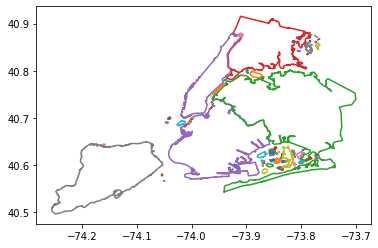

In [33]:
import matplotlib.pyplot as plt

bpoints = ()
borders = []
a = 0
boroughs = []

#getting the points for the multipolygon of each borough from the csv file
#using the lat and long from the second dataset to find out the borough and then appending it to the boroughs list

for value in nf['the_geom']:
    points = str(value)[14:-1]
    points = points.replace("((","start")
    points = points.split("start")
    for i in range(len(points)):
        points[i] =  points[i].replace(")),","") 
        points[i] =  points[i].replace("))","") 
    points.pop(0)
    for i in points:
        poin = i.split(", ")
        for s in poin:
            val = s.split(" ")
            for x in range(2):
                  bpoints += (float(val[x]),)
            borders.append(bpoints)
            bpoints = () 
        polygon = Polygon(borders)
        for z in range(len(df2_sorted)):
            point = Point(df2_sorted['long'].iloc[z], df2_sorted['lat'].iloc[z])
            if polygon.contains(point) == True:
                boroughs.append(nf['BoroName'].iloc[a])
        borders = []
        x,y = polygon.exterior.xy
        plt.plot(x,y)
    a += 1

# Visualisation of the boroughs multipolygons:

In [34]:
#Adding the Borough culumn to the station dataframe and 
#Sorted dataframe with the Borough included:
df2_sorted['Borough'] = boroughs
df2_sorted

,name,line,long,lat,Borough
0,,J,-73.928098,40.692930,Bronx
1,& Ellis St,SIR,-74.245485,40.515532,Bronx
2,103rd St & 159th Ave,A,-73.830428,40.660371,Bronx
3,103rd St & Roosevelt Ave,7,-73.862474,40.749875,Bronx
4,104th St & Jamaica Ave,J-Z,-73.843261,40.695150,Bronx
...,...,...,...,...,...
802,William St & Fulton St,A-C-J-Z-2-3-4-5,-74.006629,40.709240,Manhattan
803,William St & John St,A-C-J-Z-2-3-4-5,-74.006999,40.708630,Manhattan
804,William St & Pine St,2-3,-74.008804,40.706755,Manhattan
805,William St & Wall St,2-3,-74.009495,40.706389,Manhattan


<h3> Visualisation of the Data </h3>

Plotting the Mapo of New York City with no Details.

In [35]:
sub_map = gpd.read_file('./files/geo_export_a7137736-92f5-44f5-888c-1badc8496108.shp')

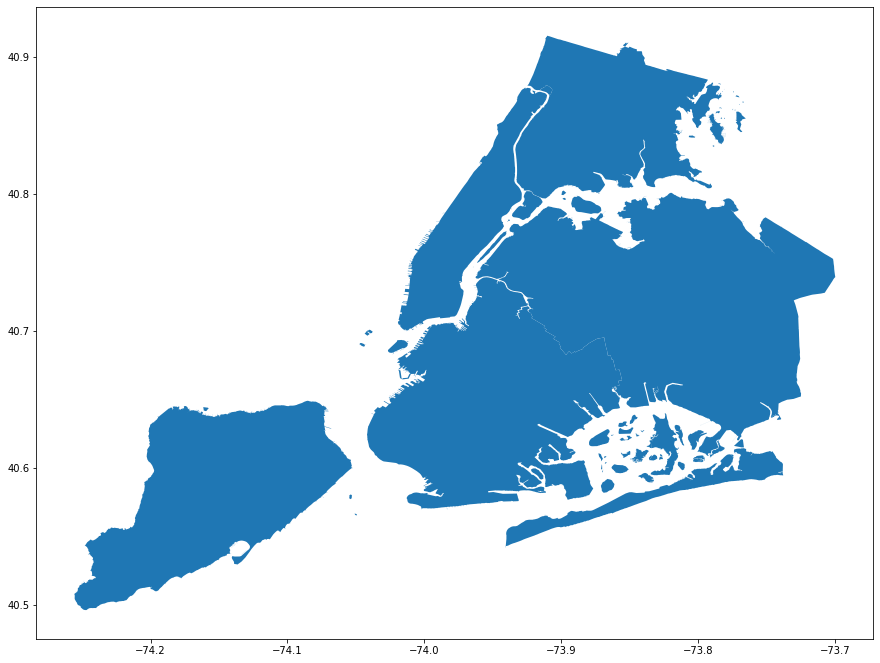

In [36]:
fig, ax = plt.subplots(figsize = (15,15))
sub_map.plot(ax = ax)

Below is the City Map Plot of NYC, with Streets included. This is what we will be using to Plot the Subway Stations and AirBnB listings on. 
Street Map Source: <a> https://streets.planning.nyc.gov/city-map?lat=-73.9708&lng=40.6938 </a>

In [37]:
street_map = gpd.read_file('./files/citymap/citymap_arterials_v0.shp')


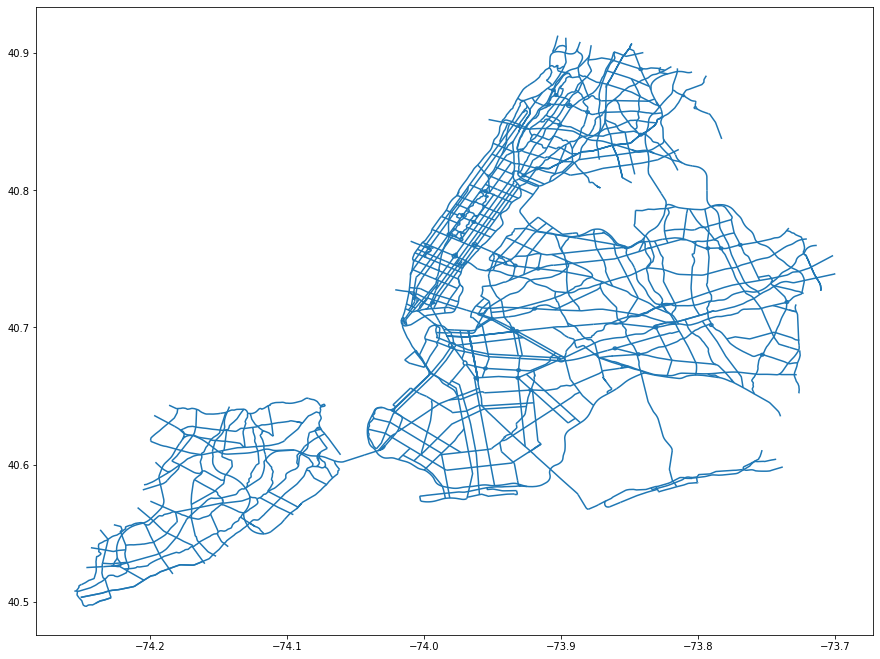

In [38]:
#Plotting the Street Map
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax)

Now using this Street Map, we are going to be plotting the resepctive AirBnB listings on it.

In [39]:
#Using the Longitude and Latitude of the First Data Set to locate the different listings
geometry = [Point(xy) for xy in zip(df1['longitude'], df1['latitude'])]
geometry[:3]

In [40]:
geo_df1 = gpd.GeoDataFrame(df1, geometry = geometry)
geo_df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,27991020,Prospect Suite,23388169,Jessica,Brooklyn,Prospect Heights,40.67752,-73.96977,Private room,200,2,33,2020-03-14,1.81,2,347,POINT (-73.96977 40.67752)
1,42529302,Large room with Queen bed,63516048,Melissa,Brooklyn,Dyker Heights,40.62228,-74.00688,Private room,60,5,1,2020-03-14,1.00,1,170,POINT (-74.00688 40.62228)
2,5115372,Comfy Room “1 Guest Only” Near LGA Airport,26432133,Danielle,Queens,East Elmhurst,40.76374,-73.87103,Private room,54,1,531,2020-03-13,13.19,5,363,POINT (-73.87103 40.76374)
3,18173787,Cute Tiny Room “1 Guest Only” by LaGuardia Air...,26432133,Danielle,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,519,2020-03-13,14.62,5,359,POINT (-73.87238 40.76380)
4,54508,Sml Rm in pr Brst Park Sl great for Med/students,210746,Kathleen R.,Brooklyn,Prospect Heights,40.67870,-73.97262,Private room,100,2,380,2020-03-13,3.82,3,0,POINT (-73.97262 40.67870)


In [41]:
#See the different Neighbourhoods (Boroughs) that listings are located in. 
df1.neighbourhood_group.unique()

array(['Brooklyn', 'Queens', 'Manhattan', 'Bronx', 'Staten Island'],
      dtype=object)

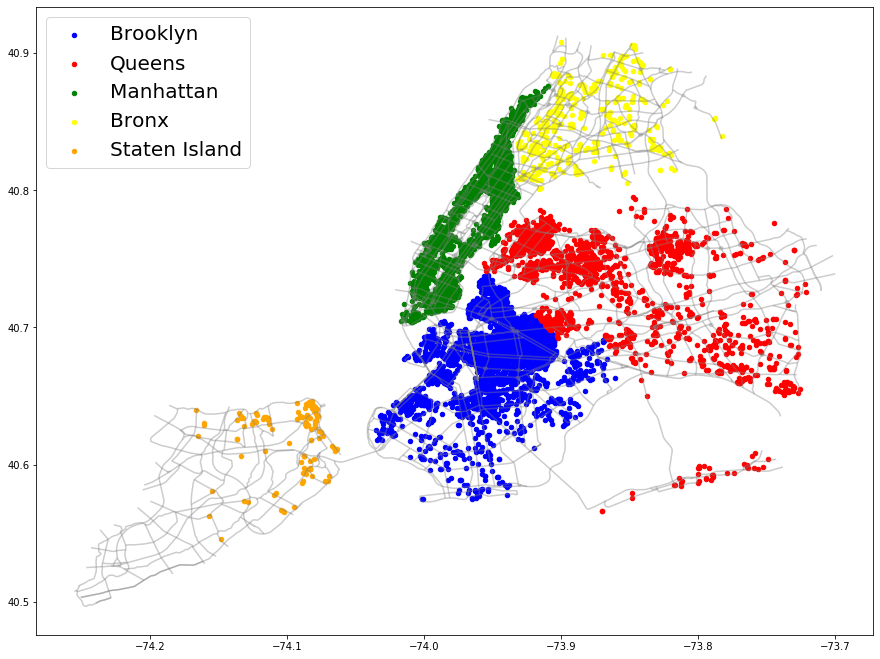

In [42]:
#Plot of all the AirBnBs within our Data Set
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df1[geo_df1['neighbourhood_group'] == 'Brooklyn'].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'Brooklyn')
geo_df1[geo_df1['neighbourhood_group'] == 'Queens'].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'Queens')
geo_df1[geo_df1['neighbourhood_group'] == 'Manhattan'].plot(ax = ax, markersize = 20, color = 'green', marker = 'o', label = 'Manhattan')
geo_df1[geo_df1['neighbourhood_group'] == 'Bronx'].plot(ax = ax, markersize = 20, color = 'yellow', marker = 'o', label = 'Bronx')
geo_df1[geo_df1['neighbourhood_group'] == 'Staten Island'].plot(ax = ax, markersize = 20, color = 'orange', marker = 'o', label = 'Staten Island')
plt.legend(prop={'size':20})

Above you can see the AirBnB listings available plotted onto a Streetmap of NYC. We colour coded the different listings according to the Neighbourhood they are located in, as the borders of these were determined earlier in the code.
From here we can now see through the Plot where and in which density AirBnB listings are located in NYC.

Next we will be plotting the Underground Stations in NYC:

In [43]:
#Same as before, combining Latitude and Longitude in order to be able to locate the Stations
geometry = [Point(xy) for xy in zip(df2_sorted['long'], df2_sorted['lat'])]
geometry[:3]

In [44]:
#The combined and sorted Dataframe which will be used to plot the Map
geo_df2 = gpd.GeoDataFrame(df2_sorted, geometry = geometry)
geo_df2.head()

,name,line,long,lat,Borough,geometry
0,,J,-73.928098,40.692930,Bronx,POINT (-73.92810 40.69293)
1,& Ellis St,SIR,-74.245485,40.515532,Bronx,POINT (-74.24548 40.51553)
2,103rd St & 159th Ave,A,-73.830428,40.660371,Bronx,POINT (-73.83043 40.66037)
3,103rd St & Roosevelt Ave,7,-73.862474,40.749875,Bronx,POINT (-73.86247 40.74987)
4,104th St & Jamaica Ave,J-Z,-73.843261,40.695150,Bronx,POINT (-73.84326 40.69515)


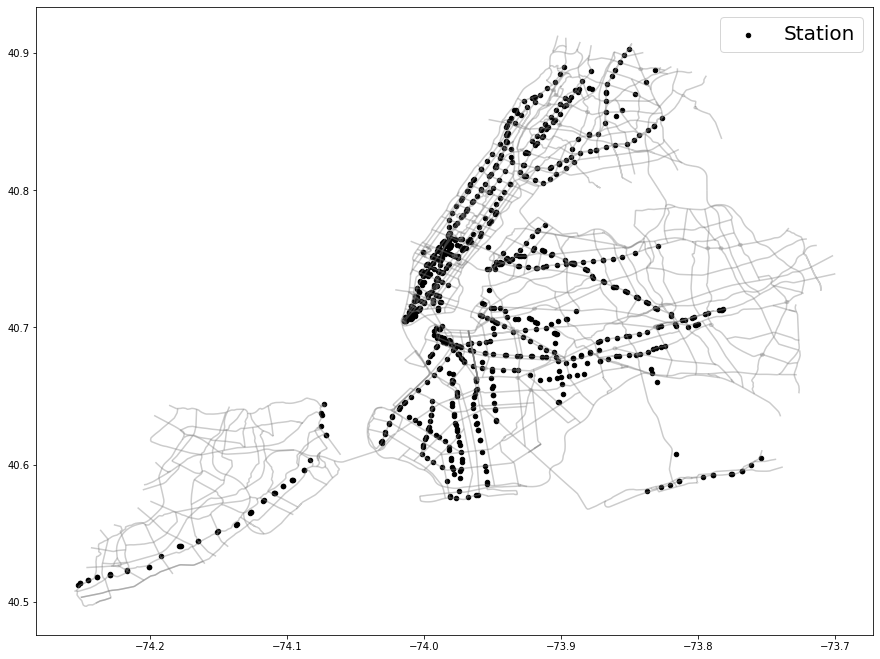

In [45]:
#Plotting the Subway Stations in NYC
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df2['geometry'].plot(ax = ax, markersize = 20, color = 'black', marker = 'o', label = 'Station')

plt.legend(prop={'size':20})

The next step is to combinde the two Plots together in order to see where the Subway Locations are in comparison to the AirBnB listings location.

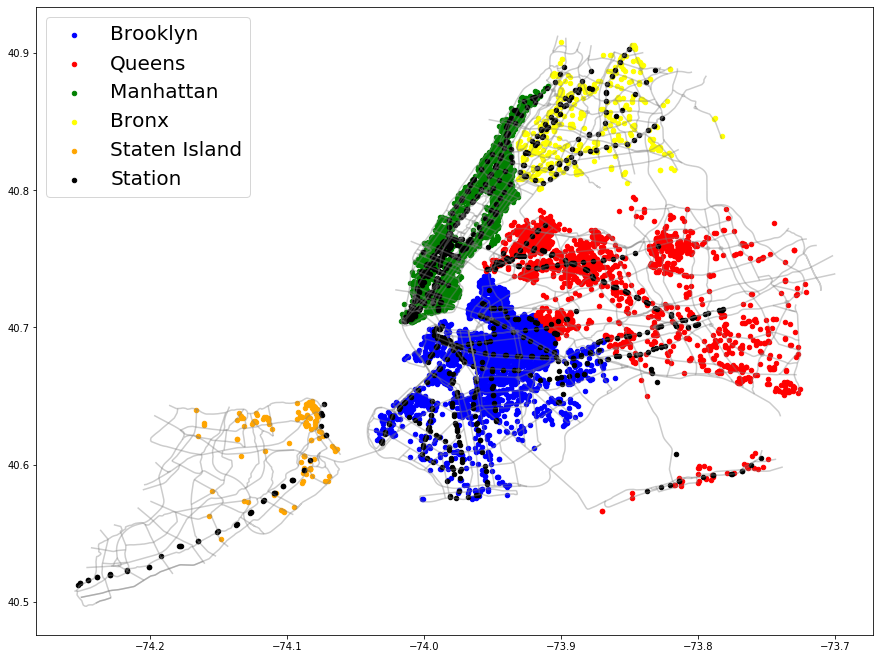

In [46]:
#Putting the two Plots together in order to have a Plot with both Subway Stations and AirBnB listings
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df1[geo_df1['neighbourhood_group'] == 'Brooklyn'].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'Brooklyn')
geo_df1[geo_df1['neighbourhood_group'] == 'Queens'].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'Queens')
geo_df1[geo_df1['neighbourhood_group'] == 'Manhattan'].plot(ax = ax, markersize = 20, color = 'green', marker = 'o', label = 'Manhattan')
geo_df1[geo_df1['neighbourhood_group'] == 'Bronx'].plot(ax = ax, markersize = 20, color = 'yellow', marker = 'o', label = 'Bronx')
geo_df1[geo_df1['neighbourhood_group'] == 'Staten Island'].plot(ax = ax, markersize = 20, color = 'orange', marker = 'o', label = 'Staten Island')
geo_df2['geometry'].plot(ax = ax, markersize = 20, color = 'black', marker = 'o', label = 'Station')
plt.legend(prop={'size':20})

As can be seen above, we now combined the two Plots in order to be able to be able to see the the subway Stations as well as the AirBnB listings grouped into the different neighbourhoods.

Next we need to calculate the distance between subway Stations and AirBnB listings in order to see whether it was an influence on the pricing of the respected listing.

We decided to find a way to reduce observations for the different distance measurements, since otherwise the process would become too expensive. 
Therefore, we decided to Filter Data Set 1 for one neighbourhood group at a time.
Then we went and for each neighbourhood group filter out the respective ID and coordinates for the respective AirBnB. We did the same for the second Data Set, being the Subway Station. We only wanted the ID and coordinates of each Station. We used the Version of the second Data Set that had sorted the Subway Stations into neighbourhoods.

We are using the Haversine Distance to calculate the distance between the Subway Stations and the AirBnB apartments. The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.

The Formular for the Haversine Distance:

$$hav(\Theta)=hav(\varphi_2-\varphi_1)+\cos(\varphi_1)hav(\lambda_2-\lambda_1)$$

In [47]:
#Function for the Distance Calculation

def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2-lat1)
   delta_lambda = np.radians(lon2-lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)))
   return np.round(res, 2)

In [ ]:
df1_f = df1 
dis1 = df1_f[['id','longitude','latitude','neighbourhood_group']].rename(columns={'longitude':'long1','latitude':'lat1'})

dist = {}
a == 1
for row1 in dis1.itertuples():
    ids = row1[1]
    liste = []
    mindist = 0
    df2_f = df2_sorted[df2_sorted['Borough'] == row[4]] 
    dis_df2 = df2_f[['name','long','lat']].rename(columns={'long':'long2','lat':'lat2'})
    for row2 in dis_df2.itertuples():       
        liste.append(haversine_distance(row1[3], row1[2], row2[3], row2[2]))
        mindist = min(liste)
        dist[ids] = mindist
    
print(dist)

In [ ]:
df_distance = pd.DataFrame(dist.items(), columns=['id', 'distance'])
df_distance

Add the distance to the airbnb object data set

In [ ]:
df_final = pd.merge(df1, df_distance, on='id')

In [ ]:
df_final

<h3> Analysis </h3>

In [ ]:
#Importing necessary libraries for plotting 
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import seaborn as sns


As a next step we are going to analyse and compare our Data. For this we decided to use different Scatter Plots. For the first plot, shown below, we compared the distance (in km) of the AirBnB listings to the Subway Stations to the price.

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_final['price'], df_final['distance'])
ax.set_xlabel('price')
ax.set_ylabel('distance')
plt.show()

In order to make the Plot more reada- and valueable we will be removing the outliers.

In [ ]:
#Filter to remove outliers
df_filtered = df_final[df_final['price'] < 200]

In [ ]:
df_filtered.shape

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_filtered['price'], df_filtered['distance'])
ax.set_xlabel('price')
ax.set_ylabel('distance')
plt.show()

The Plot above shows the Distance to the Subway Stations compared to the price with the outliers removed. This means that Prices that are either extremely high or low, in our case more high than low have been removed. We did this although there are a few very exoensive AirBnBs in NYC, they are not the norm and there are very few of them. Therefore it is more useful to us to remove them in order to evaluate our Data efficiently.

From this plot there is no exact trend to point out. If we would only be looking at this graph we would have to say that there is no obvious connection between the Price of the AirBnB and the distance to any Subway Station.

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_filtered['distance'], df_filtered['price'])
ax.set_xlabel('distance')
ax.set_ylabel('price')
plt.show()

In the Plot above it is visible that we have swapped the Axis in order to present a more understandable Plot of the Data. Here, similarly to the plot before we switched the Axis, there is no apparent trend visible. One thing, however, that can be said from this Plot, is that there are very few AirBnBs (expensive or not) that are a great distance (km) from any Subway Station. This is most likely linked to the fact that NYC is a very densely populated city, with great Infrastructure - meaning that within the city it is highly likely that a Subway Station will be more or less close.

When looking at the Plots above it is pretty apparent that the proximity to any Subway Station is not hugely responsible for the price of the AirBnB. Therefore, we decided to look at factors that might also influence the price, and one that we found to be most logical was the neighbourhood.

This part of the Analysis is more focused on our other Research Question, since the first was proven to not be the case, and that is whether the proximity to a specific subway Station equals a higher price as well as whether there are other factors which have higher impact on the price than the proximity to any Subway Station.

In order to do this we plotted the Data as shown below. For this Plot we grouped the listings into their respective Neighbourhood to see whether this changed our view on the Data.

In [ ]:
neighbourhood = df_filtered.groupby("neighbourhood_group")
for name, group in neighbourhood:
    #plt.figure(figsize=(5,6))
    plt.plot(group["price"], group["distance"], marker="o", linestyle="", label=name)
    plt.rcParams["figure.figsize"] = [16,9]
    plt.title('price and distance correlation for each neighbourhood')
plt.legend()

As the Plot above shows, the most listings are in Queens or Manhatten. Therefore, we will be taking a closer look at these two groups. The Plot shows that generally it can be said that Manhatten has higher priced listings and shorter distances to Subway Stations, while Queens seems to have a lower price in listings and higher distances to the Subway Stations. 

In [ ]:
nyc_map = gpd.read_file('./files/nyc_citymap/citymap_citymap_v1_clipped.shp')

In [ ]:
#Using the Longitude and Latitude of the First Data Set to locate the different listings
geometry = [Point(xy) for xy in zip(df_final['longitude'], df_final['latitude'])]
geometry[:3]
geo_final = gpd.GeoDataFrame(df_final, geometry = geometry)

In the next plot we will be looking at a Map of NYC, with the respective listings colour coded. Blue points show a listing that is below 100 dollars per night and red dots show listings that are over 100 dollars per night.

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
nyc_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_final[geo_final['price'] <= 100].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'price < 100 dollar')
geo_final[geo_final['price'] >= 100].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'high > 100 dollar')
plt.legend(prop={'size':20})
plt.title('prices of airbnb objects')

This plot is interesting, since it shows that there is a very dense amount of listings over 100 Dollars per night in and around Manhattan. It is safe to say that Manhattan has the highest density of high priced AirBnB listings in NYC. It is now interesting for us to see whether this has to do with the proximity to Transit options, or if it is in fact the popularity and general wealth within the area - since Manhattan is known to be the more upscale part of NYC.

In order to see whether there is a link, we decided to next plot the listings and their distance to Subway Stations. Green being less than a Kilometer, ocher being more than a Kilometer.

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
nyc_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_final[geo_final['distance'] <= 1.0].plot(ax = ax, markersize = 20, color = 'green', marker = 'o', label = 'distance < 1 kilometer')
geo_final[geo_final['distance'] >= 1.0].plot(ax = ax, markersize = 20, color = 'orange', marker = 'o', label = 'distance > 1 kilometer')
plt.legend(prop={'size':20})
plt.title('distance to subway of airbnb objects')

As it can be seen in the Plot above, Manhattens listings seem to all be very close to their respective Subway Station. However, it would be dangerous to link this directly to the price - if that would be the case AirBnBs in Brooklyn and other neighbourhoods that show up green on the map would have to be in a similar price category. Which, if you compare the two graphs, is not the case.

This is propably linked more with the way Manhattan itself is structured. If you look at the Plot of the Subway Stations in NYC, it is clear that there are a large number of Subway Stations in Manhattan, explaining the overwhelminlgly green spot in the Plot above. The high prices in Manhattan can therefore be linked more to the fact that it is a wealthy neighbourhood than the fact that it provides good Subway infrastructure.

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
nyc_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_final[geo_final['distance'] <= 0.5].plot(ax = ax, markersize = 20, color = 'green', marker = 'o', label = '< 0.5 kilometer')
geo_final[(geo_final['distance'] >= 0.5) & (geo_final['distance'] <= 1.0)].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = '0.5 - 1 kilometer')
geo_final[(geo_final['distance'] >= 1.0) & (geo_final['distance'] <= 2.0)].plot(ax = ax, markersize = 20, color = 'orange', marker = 'o', label = '1 - 2 kilometer')
geo_final[geo_final['distance'] >= 2.].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = '> 2 kilometer')
plt.legend(prop={'size':20})
plt.title('distance to next subway station')

In the Plot above we showed the distance to the nearest available Subway Station, but in this Plot we took a greater range of distances. 

We now decided to take a look at the mean price of listings in each Neighbourhood compared to the mean distance to the nearest Subway Station.

In [ ]:
#Calculate the mean of distance to subway and rental price per each neighbourhood
meanprice_df = df_final.groupby('neighbourhood_group')['price'].mean()
meandist_df = df_final.groupby('neighbourhood_group')['distance'].mean()
df_plot = pd.merge(meandist_df, meanprice_df, on='neighbourhood_group')

In [ ]:
#Putting our results into a Dataframe
df_plot

The Dataframe above shows the mean distance and price for each Neighbourhood available in our Data. If the number of available Subway Stations would not be taken into account, it could be easily said that there is a direct link between distance to any Subway Station and price. However with our geo plots taken into account it is safe to say that the neighbourhood and its reputation, and attractiveness to tourists, has a greater impact on the price than general proximity to any/or a specific Subway Station.

In [ ]:
neighbourhood = df_final.groupby("neighbourhood_group")
for name, group in neighbourhood:
    #plt.figure(figsize=(5,6))
    plt.plot(group["price"].mean(), group["distance"].mean(), marker="o", linestyle="", label=name)
    plt.rcParams["figure.figsize"] = [12,6]
    plt.title('mean price and mean distance correlation for each neighbourhood')
plt.legend()

To round off our Analysis we decided to use a Scatter Plot to visualize the price and distance correlation for each neighbourhood.

This plot supports the statement made before, and also the answer to our respective research questions:

<ol>
<li> Is the proximity of an Airbnb to any Subway Station directly related to its price, and if so, does an apartment with more proximity to any subway station automatically equal a higher price? </li>
    No, the proximity of a listing to any Subway Station does not seem to be directly related to its price. 

<li> Can and Airbnb have a higher price due to the proximity to a specific subway station, and if so which attributes of the subway station (location, number of lines, city centre) are found to influence the pricing most? </li>
    Yes and No, we discovered that Manhattan in general has more expensive listings than other neighbourhoods in NYC, 
    therefore if a listing is located in Manhattan and closer to the subway stations there, it is more likely to be
    pricey. However, we found that the location of the Subway Station, specifically which neighbourhood it is in has 
    the highest influence on the price.

<li> Which independent variables in the Data are more influential to the pricing than the proximity to a subway station? </li>
    An Independent Variable which we found had the most influence on the price was the neighbourhood in which the 
    AirBnB was located in.
</ol>


<h3> Future Work </h3>

<h4> Discussion </h4>

Concerning open Issues within our Project, it would be interesting to continue the Analysis with more Data, to see what factor about the neighbourhoods influences prices and their height the most. It would be logical to look at the average salary and the wealth of the respective neighbourhood as it would make sense that a higher gross wage across a part of NYC, such as Manhatten, would result in generally higher AirBnB prices. Another intersting project could be to find out how the prices change during the time of the year and whether there is a difference betweeen summer and winter months.
It would also be interesting to see the link between general property value across the city and the respective pricing of the AirBnB listings.

Further research within this sphere could be quite extensive as well as expensive, especially since NYC is so densely populated and there is propably a lot large Data concerning things such as property prices. 

When doing this Project in the future, a new updated Set of listings would be required. Since AirBnB is quite easy to use, there is a large fluctuation of listings - many listings used in this project might not even be available this time next year. Also the constant change of laws regarding AirBnB could have an impact on the Data available. 
As well as making this project obsolete, for example if people offering their Apartments on the website would have to match Hotel Prices or other regulations. 

Overall, however, this Project and Analysis could be nicely applied to other cities, as well as other forms of transportation or commodities. 




